# Ejercicios

## Cargar librerías

In [224]:
import pandas as pd
import re
import unicodedata
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams


## Carga nltk


In [225]:
# Descargar stopwords si no están disponibles
# nltk.download("stopwords")

# Asegurar que nltk busca en la carpeta correcta
nltk.data.path.append("nltk_data")

# Definir el idioma de stopwords (español)
stop_words = set(stopwords.words("spanish"))

# Función para eliminar acentos de las palabras
def eliminar_acentos(texto):
    if isinstance(texto, str):  # Asegurar que el input es un string
        texto = unicodedata.normalize('NFKD', texto)  # Descomponer caracteres acentuados
        texto = ''.join(c for c in texto if not unicodedata.combining(c))  # Eliminar marcas diacríticas
        return texto
    return texto  # Devolver el texto original si no es string

## Cargar datos en dataframe

In [226]:
# Definir la ruta del archivo
#ruta_archivo = "corpus/development.csv"

# Cargar el archivo CSV en un DataFrame
#df = pd.read_csv(ruta_archivo, encoding="latin1")

# Mostrar las primeras filas del DataFrame
# print(df.head())

import pandas as pd

# Definir la ruta del archivo XLSX
ruta_archivo = "corpus/development.xlsx"

# Cargar el archivo XLSX en un DataFrame usando openpyxl
df = pd.read_excel(ruta_archivo, engine="openpyxl")

# Contar incidencias en la columna de interés (ejemplo: 'categoria')
conteo = df["Category"].value_counts()

# Mostrar el conteo
print(conteo)

Category
True    153
Fake    142
Name: count, dtype: int64


## Analisis de datos

In [227]:
# Filtrar solo las filas donde 'Category' es True
df_filtrado = df[df["Category"] == 'Fake']  

# Seleccionar aleatoriamente 10 registros
df_muestra = df_filtrado.sample(n=10, random_state=42)  # Cambia el seed se requieren diferentes resultados

# Concatenar todo el texto en una sola cadena
texto_completo = " ".join(df_muestra["Text"].dropna())

# Normalizar texto
texto_completo = texto_completo.lower()

# Eliminar acentos
texto_completo = eliminar_acentos(texto_completo)

# Eliminar puntuación
texto_completo = re.sub(r"[^\w\s]", "", texto_completo)  

print(texto_completo)

# Dividir en palabras y eliminar stopwords
palabras = [word for word in texto_completo.split() if word not in stop_words]

# Contar frecuencia de palabras
contador_palabras = Counter(palabras)

print(contador_palabras)

# Obtener las n palabras más frecuentes
num_palabras = 15
top_palabras = contador_palabras.most_common(num_palabras)

juan carlos y amelie de masterchef junior protagonizaran nueva telenovela infantil en tv azteca
mexico en entrevista para un programa de television la productora de tv azteca elisa salinas revelo que luego de que la televisora hiciera una pausa de varios meses y no produjera ninguna telenovela en breve comenzaran nuevamente de lleno con la filmacion de culebrones
elisa menciono que una de las sorpresas sera que volveran a grabar telenovelas infantiles producciones que tv azteca y televisa no han realizado en anos por lo malos resultados que dieron en los ultimos anos
no voy a negar que como televisa en tv azteca atravesamos una fuerte crisis por culpa de los bajos ratings debido a que la gente ya no sintoniza television por estar en internet todo el dia
los primeros cambios que hicimos fue acabar con las telenovelas infantiles sin embargo creamos una estrategia y volveremos a filmar este tipo de producciones para ganarnos la preferencia de los ninos y adolescentes relato
salinas mencio

## Graficar top 10 repeticiones

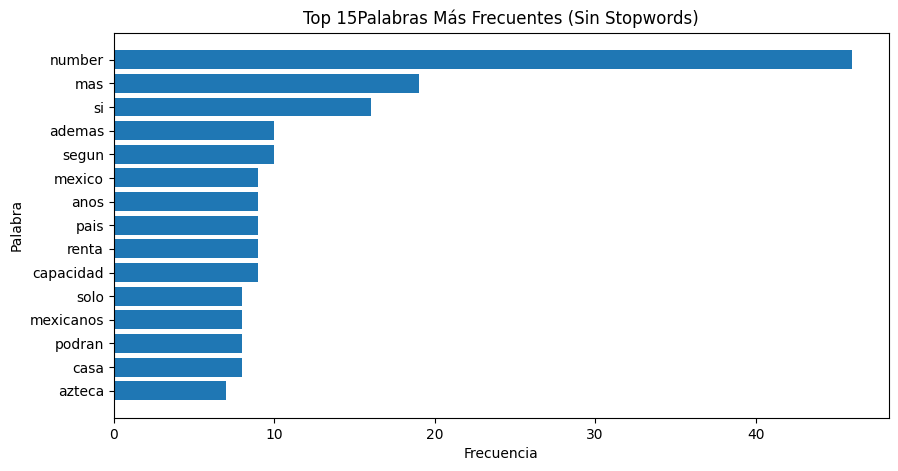

In [228]:
# Extraer datos para graficar
palabras, frecuencias = zip(*top_palabras)

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(palabras[::-1], frecuencias[::-1])  # Invertimos para mostrar la más frecuente arriba
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.title("Top "+str(num_palabras)+"Palabras Más Frecuentes (Sin Stopwords)")
plt.show()

In [229]:
# Lista para almacenar todos los ngrams
ngrams_list = []

# Procesar cada fila del DataFrame
for texto_completo in df_muestra["Text"].dropna():
    # Normalizar texto
    texto_completo = texto_completo.lower()

    # Eliminar acentos
    texto_completo = eliminar_acentos(texto_completo)

    # Eliminar puntuación
    texto_completo = re.sub(r"[^\w\s]", "", texto_completo)  

    print(texto_completo)

    # Tokenizar en palabras
    palabras = texto_completo.split()

    n_ngrams = 4 

    # Generar ngrams de n palabras
    text_ngrams = list(ngrams(palabras, n_ngrams))

    # Agregar a la lista general
    ngrams_list.extend(text_ngrams)

# Contar frecuencia de los ngrams
contador_ngrams = Counter(ngrams_list)

# Obtener los 10 ngrams más comunes
top_10_ngrams = contador_ngrams.most_common(10)

# Extraer datos para graficar
ngrams_texto, frecuencias = zip(*top_10_ngrams)
ngrams_texto = [" ".join(ngram) for ngram in ngrams_texto]  # Convertir los n-gramas a texto


juan carlos y amelie de masterchef junior protagonizaran nueva telenovela infantil en tv azteca
mexico en entrevista para un programa de television la productora de tv azteca elisa salinas revelo que luego de que la televisora hiciera una pausa de varios meses y no produjera ninguna telenovela en breve comenzaran nuevamente de lleno con la filmacion de culebrones
elisa menciono que una de las sorpresas sera que volveran a grabar telenovelas infantiles producciones que tv azteca y televisa no han realizado en anos por lo malos resultados que dieron en los ultimos anos
no voy a negar que como televisa en tv azteca atravesamos una fuerte crisis por culpa de los bajos ratings debido a que la gente ya no sintoniza television por estar en internet todo el dia
los primeros cambios que hicimos fue acabar con las telenovelas infantiles sin embargo creamos una estrategia y volveremos a filmar este tipo de producciones para ganarnos la preferencia de los ninos y adolescentes relato
salinas mencio

## Graficar ngrams

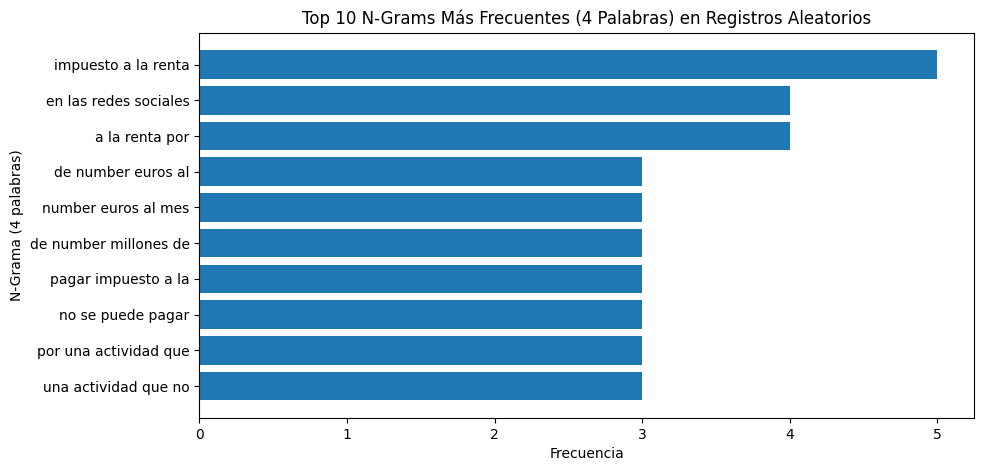

In [230]:
# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(ngrams_texto[::-1], frecuencias[::-1])  # Invertimos para mostrar el más frecuente arriba
plt.xlabel("Frecuencia")
plt.ylabel("N-Grama (4 palabras)")
plt.title("Top 10 N-Grams Más Frecuentes ("+str(n_ngrams)+ " Palabras) en Registros Aleatorios")
plt.show()